In [3]:
import matplotlib.pyplot as plt
import joblib
import pandas as pd
import seaborn as sns
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_curve, roc_auc_score
from sklearn.model_selection import train_test_split

In [4]:
df = pd.read_csv('../titanic_preprocessed.csv')
print(df.head())

X = df.drop('Survived', axis=1)
y = df['Survived']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

   Survived  Pclass  Sex       Age      Fare  Embarked  FamilySize  IsAlone
0         0       3    1 -0.565736 -0.502445         2           2        0
1         1       1    0  0.663861  0.786845         0           2        0
2         1       3    0 -0.258337 -0.488854         2           1        1
3         1       1    0  0.433312  0.420730         2           2        0
4         0       3    1  0.433312 -0.486337         2           1        1


In [5]:
dt_model = DecisionTreeClassifier(random_state=42)

In [6]:
dt_model.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

In [7]:
y_pred = dt_model.predict(X_test)

In [8]:
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

Accuracy: 0.78


Confusion Matrix:
 [[84 21]
 [18 56]]


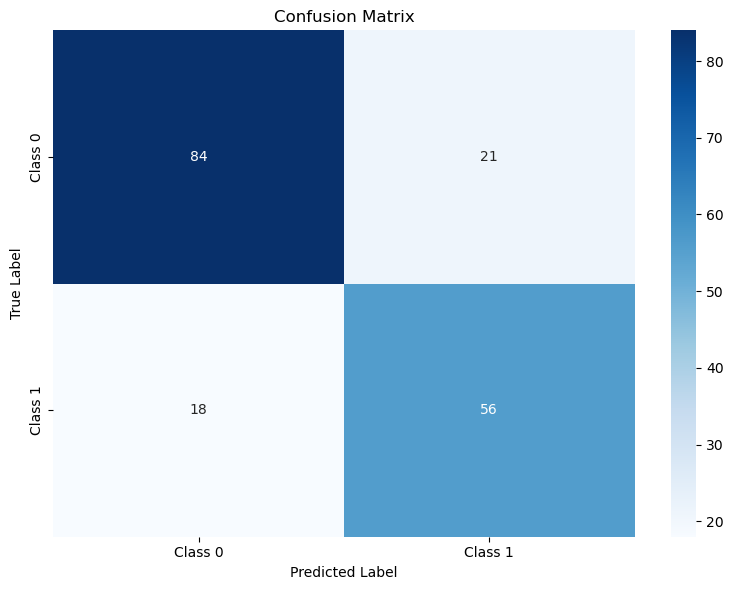

In [9]:
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", conf_matrix)

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=["Class 0", "Class 1"], yticklabels=["Class 0", "Class 1"])
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.tight_layout()
plt.show()

In [10]:
print("Classification Report:\n", classification_report(y_test, y_pred))

Classification Report:
               precision    recall  f1-score   support

           0       0.82      0.80      0.81       105
           1       0.73      0.76      0.74        74

    accuracy                           0.78       179
   macro avg       0.78      0.78      0.78       179
weighted avg       0.78      0.78      0.78       179



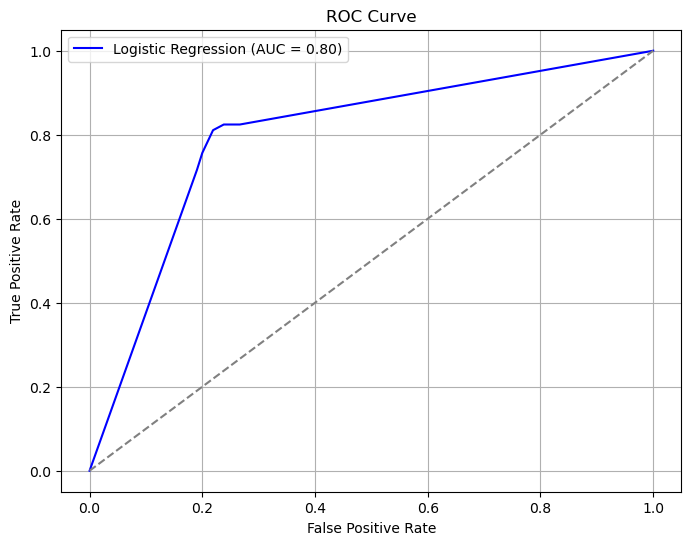

In [11]:
# ROC curve
y_pred_prob = dt_model.predict_proba(X_test)[:, 1]

fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', label='Logistic Regression (AUC = {:.2f})'.format(roc_auc_score(y_test, y_pred_prob)))
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.title('ROC Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.grid()
plt.show()

In [14]:
# download
joblib.dump(dt_model, 'decision_tree_model.pkl')

['decision_tree_model.pkl']